In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,roc_curve,roc_auc_score

In [46]:
df = pd.read_csv('telecom_customer_churn.csv')

# EDA
### Analyzing Dataset

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [48]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


## Checking Outliers of variables

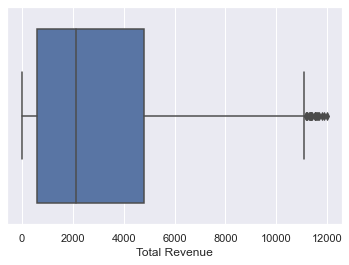

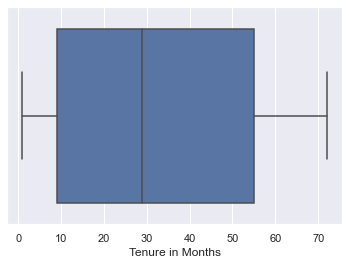

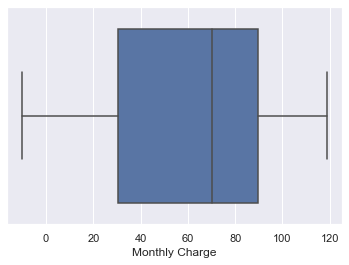

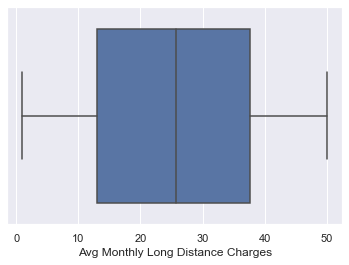

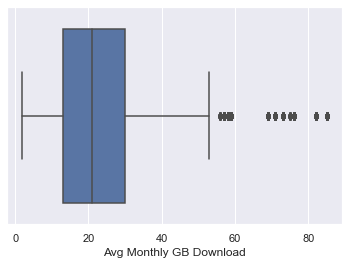

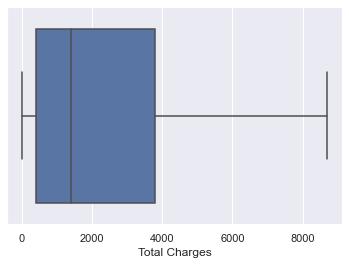

In [49]:
df_num = df[['Total Revenue','Tenure in Months','Monthly Charge','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Total Charges']]

for var, predictor in enumerate(df_num):
    plt.figure(var)
    ax = sns.boxplot(data=df, x=predictor)

## Imputing Numerical Variables with Median value and Categorial Variables with Mode value. 

In [50]:
df['Avg Monthly Long Distance Charges'].fillna(df['Avg Monthly Long Distance Charges'].median(), inplace=True)
df['Avg Monthly GB Download'].fillna(df['Avg Monthly GB Download'].median(), inplace=True)

In [51]:
df = df.fillna(df.mode().iloc[0])

In [52]:
df.isna().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data           

### Plotting Customer Status Against Independent Categorical Variables

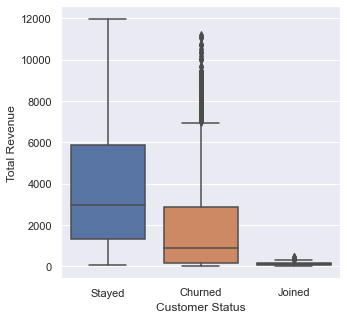

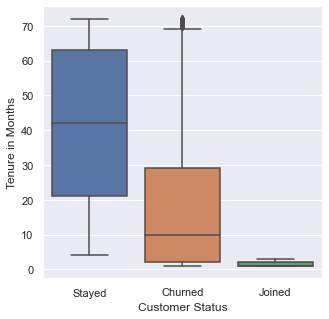

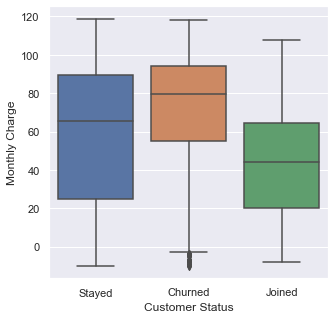

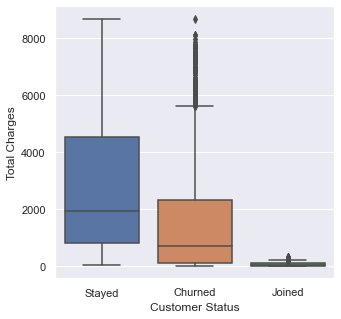

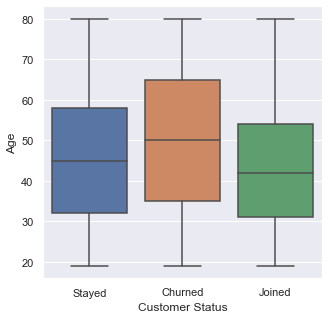

In [53]:
df_fig = df[['Total Revenue','Tenure in Months','Monthly Charge','Total Charges','Age']]

sns.set(rc={'figure.figsize':(5,5)})
for i, predictor in enumerate(df_fig):
    plt.figure(i)
    ax = sns.boxplot(data=df, x='Customer Status', y=predictor)

### Plotting Customer Status Against Independent Categorical Variables

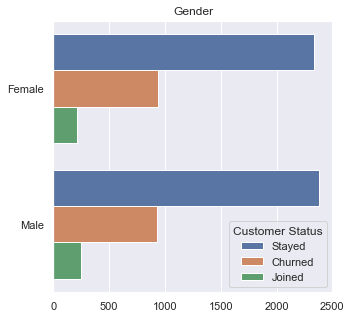

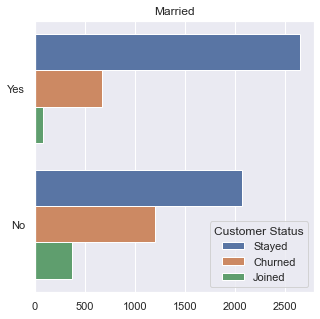

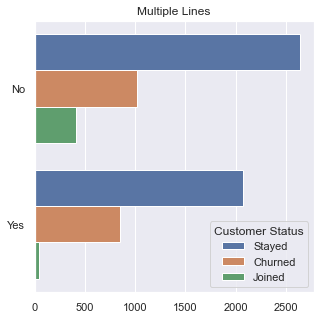

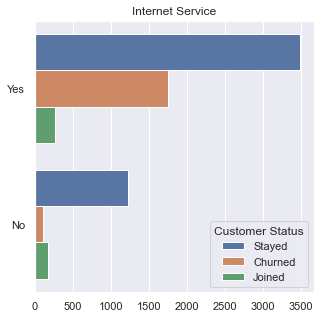

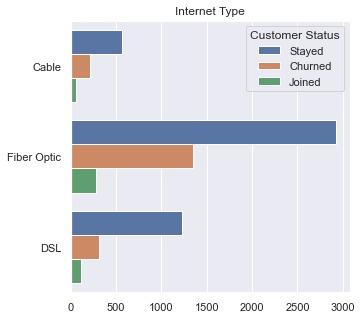

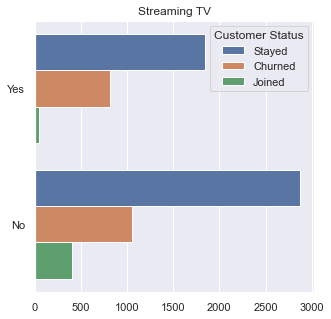

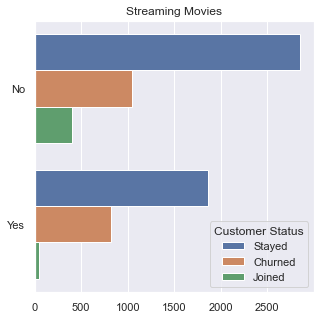

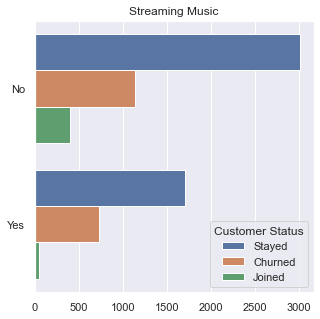

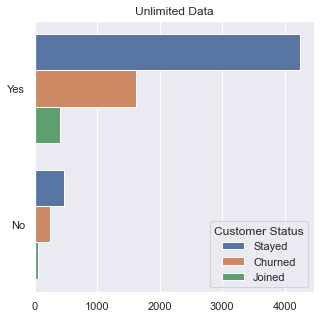

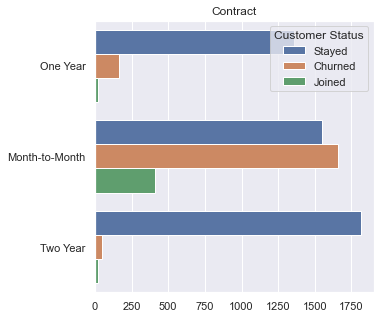

In [54]:
df_cat = df[['Gender', 'Married','Multiple Lines','Internet Service','Internet Type','Streaming TV','Streaming Movies','Streaming Music',                    
       'Unlimited Data','Contract']]
for i, predictor in enumerate(df_cat):
    plt.figure(i)
    ax = sns.countplot(data=df, y=predictor, hue= 'Customer Status',orient = 'h')
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(predictor), loc='center')

In [55]:
df_new = {"Customer Status": {"Churned": 1, "Stayed": 0, "Joined": 0}}
df = df.replace(df_new)

In [56]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,0,Competitor,Competitor had better devices
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,0,Competitor,Competitor had better devices
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,1,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,1,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,1,Dissatisfaction,Network reliability


### Checking Correlation between Target Variable and Independent Numerical Variables 

In [57]:
corr = df.corr()
corr.style.background_gradient(cmap='BuPu')

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
Age,1.000000,-0.119000,-0.008183,-0.010305,0.007612,-0.025141,0.009927,-0.019059,-0.498385,0.134511,0.059684,0.024168,0.025036,0.003065,0.048265,0.115760
Number of Dependents,-0.119000,1.000000,0.016493,0.029081,-0.024271,0.278003,0.108237,-0.002670,0.227794,-0.125649,0.022535,0.014023,-0.014436,0.068966,0.038038,-0.218780
Zip Code,-0.008183,0.016493,1.000000,0.894769,-0.790564,0.001463,0.007146,0.011718,-0.004557,-0.002517,0.001978,-0.003797,-0.014550,0.005063,0.002944,-0.016289
Latitude,-0.010305,0.029081,0.894769,1.000000,-0.885979,0.018715,0.011963,0.013814,-0.015957,-0.021613,-0.002784,-0.009901,-0.013233,0.008029,0.000082,-0.041546
Longitude,0.007612,-0.024271,-0.790564,-0.885979,1.000000,-0.009893,-0.009672,-0.014743,0.017884,0.021052,0.003811,-0.000597,0.010461,-0.006923,0.001062,0.024052
Number of Referrals,-0.025141,0.278003,0.001463,0.018715,-0.009893,1.000000,0.326975,0.001653,0.064407,0.026301,0.250378,0.024756,0.000350,0.216190,0.261853,-0.286540
Tenure in Months,0.009927,0.108237,0.007146,0.011963,-0.009672,0.326975,1.000000,0.012051,0.038310,0.239065,0.826074,0.059021,0.082266,0.674149,0.853146,-0.352861
Avg Monthly Long Distance Charges,-0.019059,-0.002670,0.011718,0.013814,-0.014743,0.001653,0.012051,1.000000,0.017746,0.017072,0.015878,-0.024906,0.020002,0.523502,0.167496,0.002571
Avg Monthly GB Download,-0.498385,0.227794,-0.004557,-0.015957,0.017884,0.064407,0.038310,0.017746,1.000000,0.076916,0.075118,-0.007360,0.032773,0.019798,0.065572,-0.055759
Monthly Charge,0.134511,-0.125649,-0.002517,-0.021613,0.021052,0.026301,0.239065,0.017072,0.076916,1.000000,0.622810,0.023963,0.121238,0.235685,0.563249,0.187833


### Imputing Categorical Boolean Variables with Numerical Boolean Variables

In [60]:
df_new1 = {"Gender": {"Male": 1, "Female": 0},"Married":{"Yes":1,"No":0},'Phone Service':{"Yes":1,"No":0},'Multiple Lines':{"Yes":1,"No":0},'Internet Service':{"Yes":1,"No":0},'Offer':{"Yes":1,"No":0},'Device Protection Plan':{"Yes":1,"No":0},'Premium Tech Support':{"Yes":1,"No":0},'Streaming TV':{"Yes":1,"No":0},'Streaming Movies':{"Yes":1,"No":0},"Contract":{"Month-to-Month":1,"One Year":2,"Two Year":3},'Streaming Music':{"Yes":1,"No":0},'Unlimited Data':{"Yes":1,"No":0},'Contract':{"Yes":1,"No":0}}
df = df.replace(df_new1)

In [72]:
df_new2 = {"Contract": {"Month-to-Month":1,"One Year":2,"Two Year":3},"Churn Category":{'Competitor':1, 'Dissatisfaction':2, 'Other':3, 'Price':4, 'Attitude':5}}
df = df.replace(df_new2)

In [76]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,0,37,1,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,0,1,Competitor had better devices
1,0003-MKNFE,1,46,0,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,0,1,Competitor had better devices
2,0004-TLHLJ,1,50,0,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,1,1,Competitor had better devices
3,0011-IGKFF,1,78,1,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,1,2,Product dissatisfaction
4,0013-EXCHZ,0,75,1,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,1,2,Network reliability


### Dropping of insignificant Variables

In [82]:
df_test = df.drop(['Customer ID','Zip Code','City','Latitude','Longitude','Number of Referrals','Payment Method','Number of Dependents','Internet Type','Offer','Online Security','Online Backup','Device Protection Plan','Premium Tech Support','Paperless Billing','Total Refunds','Churn Reason'], axis = 1)

# Data Modeling
### Splitting Dataset into Training and Testing subsets

In [83]:
x=df_test.drop('Customer Status',axis=1)
y=df_test['Customer Status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

 ### Logistic Regression

In [106]:
lr_model = LogisticRegression(class_weight='balanced', random_state=1)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
#acc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))

Accuracy: 0.7165591397849462
Recall: 0.8112903225806452


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


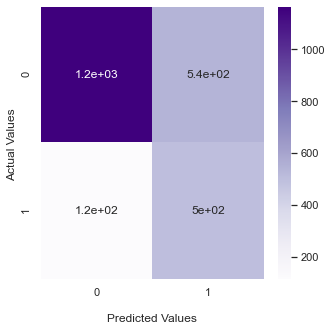

[[1163  542]
 [ 117  503]]


In [108]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm,annot=True,cmap='Purples')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()
print(cm)

### Decision Tree

In [124]:
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))

Accuracy: 0.8576344086021506
Recall: 0.7709677419354839


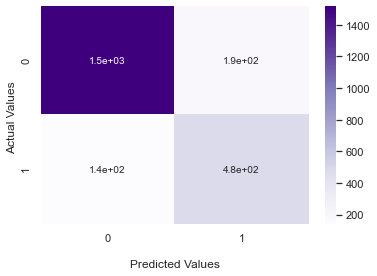

[[1516  189]
 [ 142  478]]


In [125]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm,annot=True,cmap='Purples')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()
print(cm)

### Random Forest Classifier

In [128]:
frst = RandomForestClassifier(n_estimators=200,random_state=1)
frst.fit(x_train, y_train)
y_pred=frst.predict(x_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test,y_pred))

Accuracy: 0.9101075268817205
Recall: 0.7580645161290323


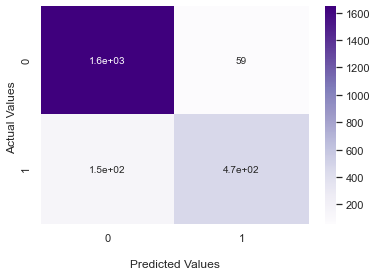

[[1646   59]
 [ 150  470]]


In [129]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm,annot=True,cmap='Purples')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()
print(cm)

## Plotting of ROC curve for Random Forest Classifier 

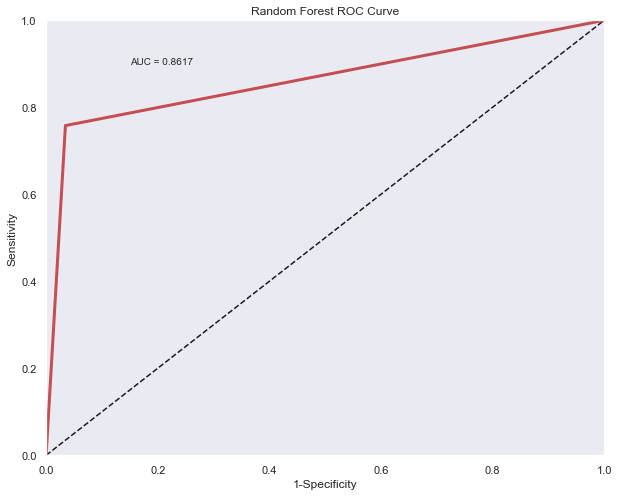

In [163]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
aucval = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_Nb, tpr_Nb,"r",linewidth = 3)
plt.grid()
plt.xlabel ("1-Specificity")
plt.ylabel ("Sensitivity")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title ("Random Forest ROC Curve")
plt.text(0.15,0.9,"AUC = "+str(round(aucval,4)))
plt.show()

# Conclusion

#### Random Forest Classifier technique is the best model as it gives us the most accuracy of 91% and an AUC score of 0.8617.
#### According to Correlation Matrix, Total Revenue and Total Charges variables are positively correlated with Tenure in Months variables.
#### Also, as expected, Total Charges Variable is positively correlated with Total Revenue.
#### Following are the Insights from EDA - 
##### 1. Unmarried Customers are more prone to churning. 
##### 2. Customers who have taken the Internet service have less churn rate compared to people who don't have internet service from this provider. 
##### 3. Also, among the customers who have the Internet service, customers who have Fiber Optic types of Internet are more likely to churn.
##### 4. Another Interesting insight is that Customers who have unlimited data have more churn rate than those who don't.
##### 5. Customers who have not committed to long-term plans (monthly plan) are more likely to churn compared to customers who have a one-year or two-year plan. 